In [1]:
import os
import time
import h5py
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

In [4]:
start = time.time()

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

0.0313379764557


In [5]:
start = time.time()

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

42.8760650158


In [6]:
start = time.time()

folder = '/home/idies/workspace/scratch'

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

44.9601199627


In [7]:
del lw2,lS2

In [8]:
start = time.time()

w2 = 0.5*w2

end = time.time()
print(end-start)

4.02317905426


In [9]:
avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

(249.21841, 249.2186, 7.3471887e-07)


In [10]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

10.4407868385


In [12]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [13]:
start = time.time()

for i in range(N):
    if i<N//2:
        X[i,:,:] = i*isotropic1024coarse['dx']
    else:
        X[i,:,:] = isotropic1024coarse['lx']-i*isotropic1024coarse['dx']
    
for j in range(N):
    if j<N//2:
        Y[:,j,:] = j*isotropic1024coarse['dx']
    else:
        Y[:,j,:] = isotropic1024coarse['lx']-j*isotropic1024coarse['dx']
    
for k in range(N):
    if k<N//2:
        Z[:,:,k] = k*isotropic1024coarse['dx']
    else:
        Z[:,:,k] = isotropic1024coarse['lx']-k*isotropic1024coarse['dx']

end = time.time()
print(end-start)

108.637951136


In [14]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

del X,Y,Z

In [15]:
E_bins = 200
w2min = np.min(w2)/avgO
w2max = np.max(w2)/avgO

In [16]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 

In [17]:
print(w2min,w2max)
print(len(tl))
stl = range(E_bins-1)

(1.4302009e-07, 675.16833)
200


In [18]:
debug_mode = False

In [19]:
start = time.time()

lcorr = []
llogr = []

for i in range(E_bins-1):
    start = time.time()
    
    tm = tl[i]
    tM = tl[i+1]
    chi[:,:,:] = 0
    chi[(w2 > tm*avg)&(w2 < tM*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    lcorr.append(corrLoc)
    llogr.append(r2Loc)
    
    end = time.time()
    if(debug_mode):
        print("time : "+str(end-start))

In [48]:
eta = 0.00280

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

fiits = []    
for i in range(E_bins-1):
    tm = tl[i]
    tM = tl[i+1]
    corrF = lcorr[i]/llogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    idx = tempCorrF>0
    
    if(len(tempCorrF[idx])>0):
        fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
    else:
        fit = np.array([-4,0])
    
    fiits.append(fit[0])
    if(debug_mode):
        print("t = "+str(np.sqrt(tm*tM))+"*sigma_2: Linear fit [alpha A] = "+str(fit))
    
fiits = np.array(fiits)

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [ ]:
start = time.time()

tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 
scorr = []
slogr = []

for i in range(E_bins-1):
    start = time.time()
    
    tm = tl[i]
    tM = tl[i+1]
    
    chi[:,:,:] = 0
    chi[(S2 > tm*avg)&(S2 < tM*avg)] = 1
    
    fo[:,:,:] = chi[:,:,:]
    fft_object.update_arrays(fo,bo)
    fft_object.execute()
    cchi[:,:,:] = bo[:,:,:]
    
    tmp = cchi*(cchi.conj())
    
    bo[:,:,:] = tmp[:,:,:]
    ifft_object.update_arrays(bo,fo)
    ifft_object.execute()
    corr[:,:,:] = fo[:,:,:]/(N**3)
    
    iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
    corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
    r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
    
    scorr.append(corrLoc)
    slogr.append(r2Loc)
    
    end = time.time()
    if(debug_mode):
        print("time : "+str(end-start))

In [51]:
eta = 0.00280

tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins,endpoint=True,base=np.e) 
rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

sfiits = []    
for i in range(E_bins-1):
    tm = tl[i]
    tM = tl[i+1]
    corrF = scorr[i]/slogr[i]
    tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    idx = tempCorrF>0
    
    if(len(tempCorrF[idx])>0):
        fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
    else:
        fit = np.array([-4,0])
    
    sfiits.append(fit[0])
    if(debug_mode):
        print("t = "+str(np.sqrt(tm*tM))+"*sigma_2: Linear fit [alpha A] = "+str(fit))
        
sfiits = np.array(sfiits)

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


In [54]:
sidx = sfiits != -4.

In [55]:
print(sfiits)

[-4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -4.         -4.         -4.         -4.         -4.
 -4.         -4.         -1.04149437 -4.         -4.         -4.
 -1.10048943 -1.14628457 -2.0684907  -1.96094852 -4.4490416  -1.84541468
 -1.89887247 -1.963706   -1.81936137 -1.72560617 -1.49410942 -1.37225614
 -1.30733651 -0.9639441  -0.59324394 -0.75664706 -0.68783287 -0.73579281
 -0.68156884 -0.65970877 -0.69429102 -0.72385859 -0.69582811 -0.73369611
 -0.69220778 -0.74126099 -0

In [33]:
np.savez("shells-dims.npz",fiits=fiits,sfiits=sfiits)

In [65]:
print(tl)
print(fiits+3)

[  1.43020107e-07   1.59959574e-07   1.78905371e-07   2.00095131e-07
   2.23794630e-07   2.50301126e-07   2.79947081e-07   3.13104338e-07
   3.50188778e-07   3.91665543e-07   4.38054864e-07   4.89938590e-07
   5.47967484e-07   6.12869388e-07   6.85458349e-07   7.66644830e-07
   8.57447132e-07   9.59004164e-07   1.07258973e-06   1.19962850e-06
   1.34171389e-06   1.50062804e-06   1.67836416e-06   1.87715156e-06
   2.09948356e-06   2.34814883e-06   2.62626630e-06   2.93732432e-06
   3.28522442e-06   3.67433021e-06   4.10952214e-06   4.59625870e-06
   5.14064491e-06   5.74950885e-06   6.43048734e-06   7.19212172e-06
   8.04396495e-06   8.99670148e-06   1.00622812e-05   1.12540695e-05
   1.25870145e-05   1.40778351e-05   1.57452302e-05   1.76101135e-05
   1.96958758e-05   2.20286781e-05   2.46377803e-05   2.75559076e-05
   3.08196612e-05   3.44699776e-05   3.85526417e-05   4.31188612e-05
   4.82259091e-05   5.39378417e-05   6.03263022e-05   6.74714193e-05
   7.54628124e-05   8.44007154e-05

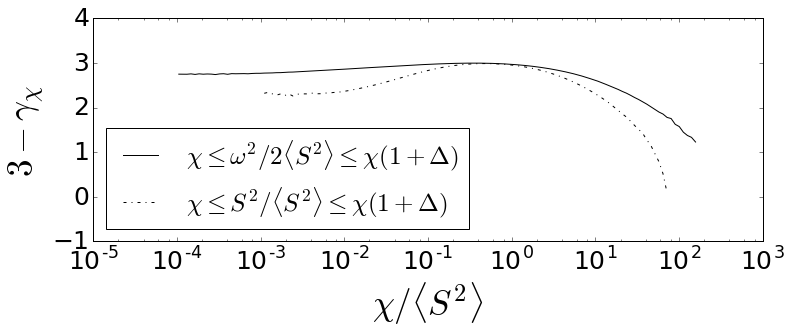

In [75]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

idx = (fiits > -3.)&(fiits <= 0.)&(tl>10**(-4))&(tl<10**(2.2))
sidx = (sfiits > -3.)&(sfiits <= 0.)&(tl>10**(-3))&(tl<10**(2.1))
ptl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

plt.figure(figsize=(12,4))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
plt.xlim([10**(-5),10**(3)])
plt.ylim([-1,4])
#plt.grid()

plt.xlabel(r'$\chi/\langle S^2\rangle$', fontsize=35)
plt.ylabel(r'$3-\gamma_\chi$', fontsize=35)

#plt.axvline(1,color='k',linestyle='--')
plt.semilogx(ptl[idx],fiits[idx]+3,'k-',label=r'$\chi \leq \omega^2/2\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.semilogx(ptl[sidx],sfiits[sidx]+3,'k-.',label=r'$\chi \leq S^2/\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.legend(loc='lower left',prop={'size':25})
plt.savefig('interval-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

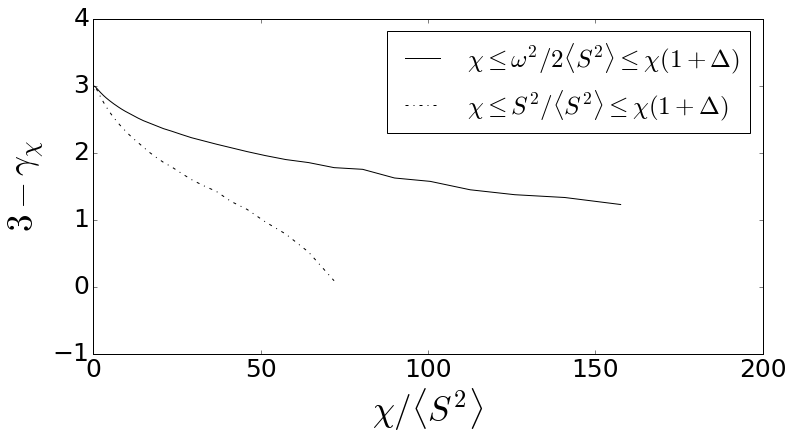

In [69]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

idx = (fiits > -3.)&(fiits <= 0.)&(tl>10**(-4))&(tl<10**(2.2))
sidx = (sfiits > -3.)&(sfiits <= 0.)&(tl>10**(-3))&(tl<10**(2.1))
ptl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
plt.xlim([10**(-5),2*10**(2)])
plt.ylim([-1,4])
#plt.grid()

plt.xlabel(r'$\chi/\langle S^2\rangle$', fontsize=35)
plt.ylabel(r'$3-\gamma_\chi$', fontsize=35)

plt.plot(ptl[idx],fiits[idx]+3,'k-',label=r'$\chi \leq \omega^2/2\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.plot(ptl[sidx],sfiits[sidx]+3,'k-.',label=r'$\chi \leq S^2/\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.legend(loc='upper right',prop={'size':25})
plt.savefig('interval-1-lin.pdf', format='pdf', bbox_inches='tight', transparent=True)

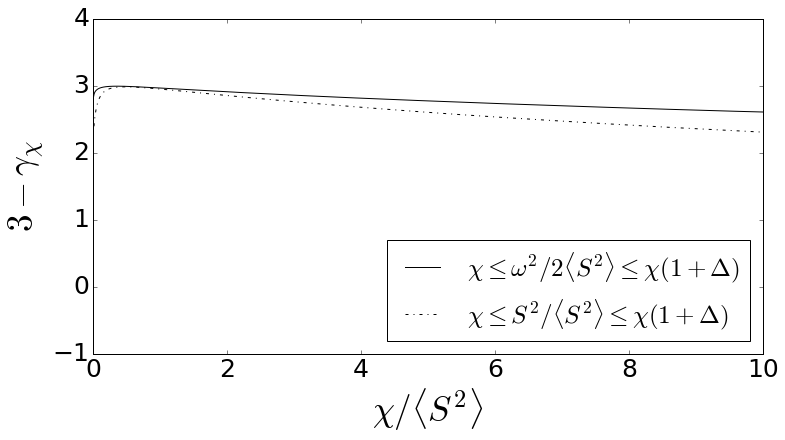

In [71]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

idx = (fiits > -3.)&(fiits <= 0.)&(tl>10**(-4))&(tl<10**(2.2))
sidx = (sfiits > -3.)&(sfiits <= 0.)&(tl>10**(-3))&(tl<10**(2.1))
ptl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
plt.xlim([10**(-5),10**(1)])
plt.ylim([-1,4])
#plt.grid()

plt.xlabel(r'$\chi/\langle S^2\rangle$', fontsize=35)
plt.ylabel(r'$3-\gamma_\chi$', fontsize=35)

plt.plot(ptl[idx],fiits[idx]+3,'k-',label=r'$\chi \leq \omega^2/2\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.plot(ptl[sidx],sfiits[sidx]+3,'k-.',label=r'$\chi \leq S^2/\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.legend(loc='lower right',prop={'size':25})
plt.savefig('interval-2-lin.pdf', format='pdf', bbox_inches='tight', transparent=True)

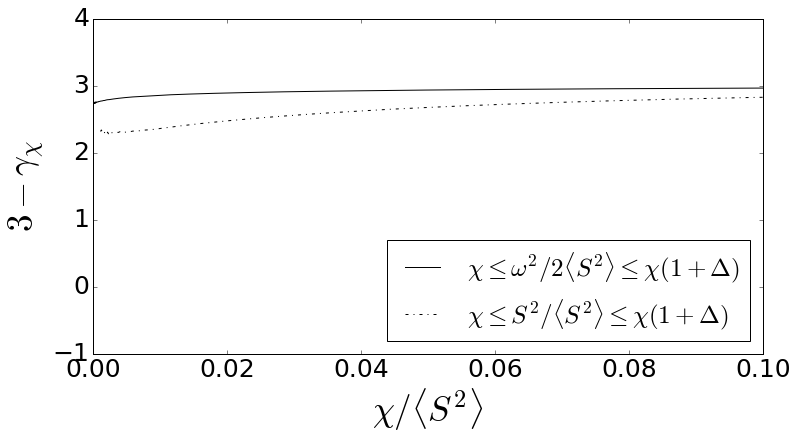

In [73]:
tl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

idx = (fiits > -3.)&(fiits <= 0.)&(tl>10**(-4))&(tl<10**(2.2))
sidx = (sfiits > -3.)&(sfiits <= 0.)&(tl>10**(-3))&(tl<10**(2.1))
ptl = np.logspace(np.log(w2min),np.log(w2max),num=E_bins-1,endpoint=False,base=np.e) 

plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
plt.xlim([10**(-5),10**(-1)])
plt.ylim([-1,4])
#plt.grid()

plt.xlabel(r'$\chi/\langle S^2\rangle$', fontsize=35)
plt.ylabel(r'$3-\gamma_\chi$', fontsize=35)

plt.plot(ptl[idx],fiits[idx]+3,'k-',label=r'$\chi \leq \omega^2/2\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.plot(ptl[sidx],sfiits[sidx]+3,'k-.',label=r'$\chi \leq S^2/\langle S^2\rangle \leq \chi(1+\Delta)$')
plt.legend(loc='lower right',prop={'size':25})
plt.savefig('interval-2-lin.pdf', format='pdf', bbox_inches='tight', transparent=True)